# Разведочный анализ данных

## Задание:
- Выбрать набор данных (датасет). Вы можете найти список свободно распространяемых датасетов здесь.
- Для первой лабораторной работы рекомендуется использовать датасет без пропусков в данных, например из Scikit-learn.
- Пример преобразования датасетов Scikit-learn в Pandas Dataframe можно посмотреть здесь.
Для лабораторных работ не рекомендуется выбирать датасеты большого размера.

- Создать ноутбук, который содержит следующие разделы:
1. Текстовое описание выбранного Вами набора данных.
2. Основные характеристики датасета.
3. Визуальное исследование датасета.
4. Информация о корреляции признаков.
- Сформировать отчет и разместить его в своем репозитории на github.

## 1) Текстовое описание набора данных

В качестве набора данных будем использовать датасет в котором содержится информация о ценах пиццы в различных популярных пиццериях.
Файл pizza_data.csv содержит следующие колонки:
- Company - Название компании
- Pizza Name - Название пиццы
- Type - Тип пиццы
- Size - Размер пиццы в дюймах
- Price - Цена пиццы в долларах

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Загрузка данных

In [2]:
df = pd.read_csv("pizza_data.csv")

## 2) Основные характеристики датасета

In [3]:
#Отобразим первые 5 строк датасета:
df.head()

,Company,Pizza Name,Type,Size,Price
0,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Small (10"")",$5.99
1,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Medium (12"")",$7.99
2,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Large (14"")",$9.99
3,Domino's Pizza,Handmade Pan,Cheeses Pizza,"Medium (12"")",$7.99
4,Domino's Pizza,Crunchy Thin Crust,Cheeses Pizza,"Small (10"")",$5.99


In [4]:
#Определим размер датасета
size = df.shape
print("Всего строк: {}".format(size[0]))
print("Всего столбцов: {}".format(size[1]))

Всего строк: 371
Всего столбцов: 5


In [5]:
#Список колонок с типами данных
df.dtypes

Company       object
Pizza Name    object
Type          object
Size          object
Price         object
dtype: object

Преобразуем столбцы "Price" и "Size" в тип float и int соответственно:

In [6]:
for i in range(df.shape[0]):
    df["Price"][i] = float(df["Price"][i][1:])
    if "Small" in df["Size"][i]:
        df["Size"][i] = 10
    elif "Medium" in df["Size"][i]:
        df["Size"][i] = 12
    elif "Large" in df["Size"][i]:
        df["Size"][i] = 14
    elif "X-Large" in df["Size"][i]:
        df["Size"][i] = 16
    elif "Personal" in df["Size"][i]:
        df["Size"][i] = 7
    elif "Mini" in df["Size"][i]:
        df["Size"][i] = 8
    elif "Jumbo" in df["Size"][i]:
        df["Size"][i] = 18
df["Size"] = df["Size"].astype("int")
df["Price"] = df["Price"].astype("float")

In [7]:
#Проверим результат 
df.dtypes

Company        object
Pizza Name     object
Type           object
Size            int32
Price         float64
dtype: object

In [8]:
#Проверка на наличие пустых значений
for col in df.columns:
    temp = df[df[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp))

Company - 0
Pizza Name - 0
Type - 0
Size - 0
Price - 0


In [9]:
#Найдём основные статичтические характеристики набора данных
df.describe()

,Size,Price
count,371.000000,371.000000
mean,12.506739,16.319326
std,2.290246,5.714662
min,7.000000,4.290000
25%,12.000000,12.490000
50%,12.000000,15.490000
75%,14.000000,19.950000
max,18.000000,29.990000


## 3) Визуальное исследование датасета

### Диаграмма расеяния

<AxesSubplot:xlabel='Size', ylabel='Price'>

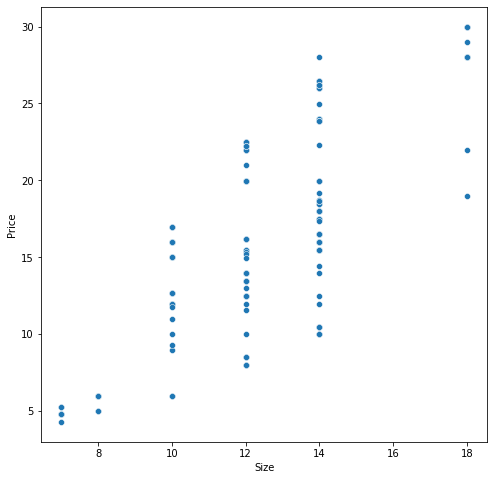

In [10]:
fig, ax = plt.subplots(figsize=(8,8)) 
sns.scatterplot(ax=ax, x='Size', y='Price', data=df)

<AxesSubplot:xlabel='Size', ylabel='Price'>

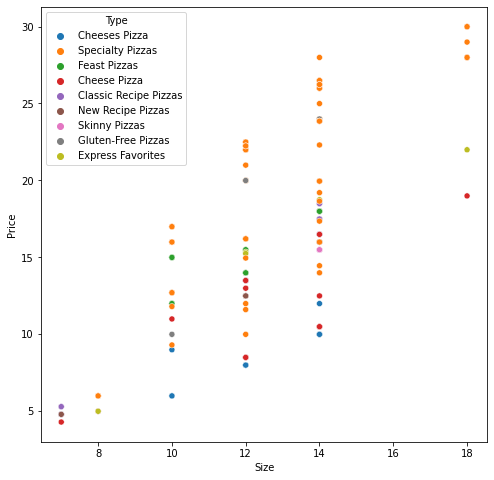

In [11]:
#Зависимость цены и размера от типа пиццы
fig, ax = plt.subplots(figsize=(8,8)) 
sns.scatterplot(ax=ax, x='Size', y='Price', data=df, hue="Type")

### Гистограмма

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

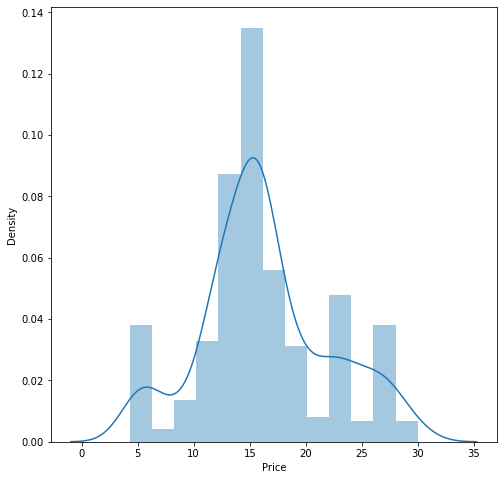

In [12]:
#Оценим распределение цены с помощью гистограммы
fig, ax = plt.subplots(figsize=(8,8)) 
sns.distplot(df["Price"])

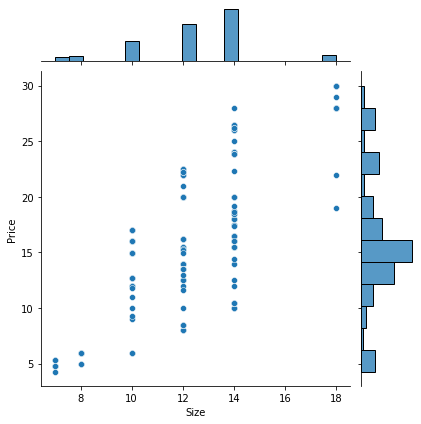

In [13]:
#Комбинация гистограмм и диаграмм рассеивания
sns.jointplot(x='Size', y='Price', data=df)

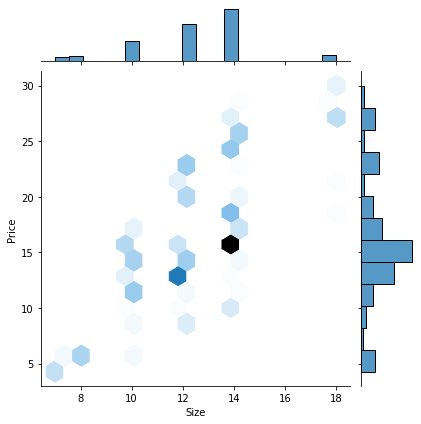

In [14]:
sns.jointplot(x='Size', y='Price', data=df, kind="hex")

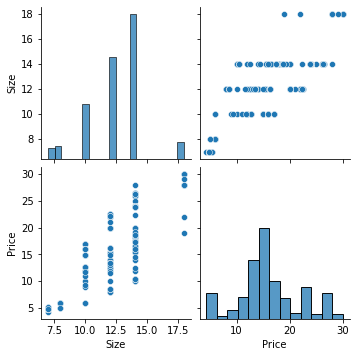

In [15]:
#Парные диаграммы
sns.pairplot(df)

### Ящик с усами

<AxesSubplot:xlabel='Price'>

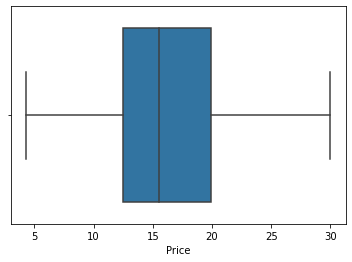

In [16]:
sns.boxplot(x=df["Price"])

<AxesSubplot:xlabel='Price', ylabel='Company'>

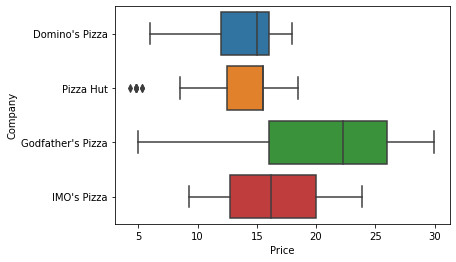

In [17]:
sns.boxplot(x="Price", y="Company", data=df)

### Violin plot

<AxesSubplot:xlabel='Size'>

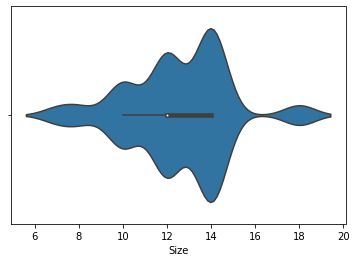

In [18]:
sns.violinplot(x=df["Size"])

<AxesSubplot:xlabel='Size', ylabel='Price'>

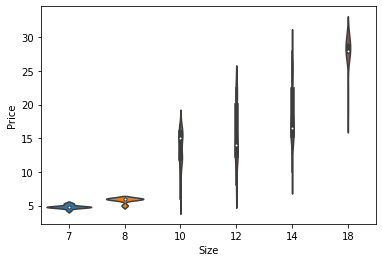

In [19]:
sns.violinplot(x="Size", y="Price", data=df)

## 4) Информация о корреляции признаков

In [20]:
#Корреляция по критерию Пирсона
df.corr(method="pearson")

,Size,Price
Size,1.000000,0.711833
Price,0.711833,1.000000


In [21]:
#Корреляция Кендалла
df.corr(method="kendall")

,Size,Price
Size,1.000000,0.525855
Price,0.525855,1.000000


In [22]:
#Корреляция Спирмена
df.corr(method="spearman")

,Size,Price
Size,1.000000,0.633828
Price,0.633828,1.000000


<AxesSubplot:>

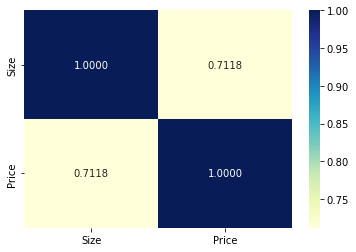

In [23]:
#Визуализация корреляционной матрицы
sns.heatmap(df.corr(), annot=True, fmt=".4f", cmap="YlGnBu")

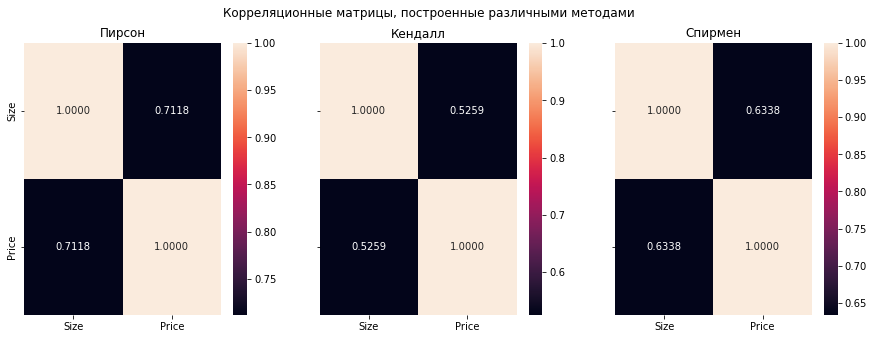

In [24]:
fig, ax = plt.subplots(1, 3, sharex="col", sharey="row", figsize=(15,5))
sns.heatmap(df.corr(method="pearson"), ax=ax[0], annot=True, fmt=".4f")
sns.heatmap(df.corr(method="kendall"), ax=ax[1], annot=True, fmt=".4f")
sns.heatmap(df.corr(method="spearman"), ax=ax[2], annot=True, fmt=".4f")
fig.suptitle("Корреляционные матрицы, построенные различными методами")
ax[0].title.set_text("Пирсон")
ax[1].title.set_text("Кендалл")
ax[2].title.set_text("Спирмен")